In [1]:
import pandas as pd
import numpy as np
import time
import datetime
from datetime import date, timedelta
import warnings
warnings.filterwarnings('ignore')

In [2]:
print(np.__version__)

1.20.1


In [3]:
year = ['2010', '2011', '2012', '2013', '2014', '2015', '2016' ,'2017', '2018', '2019']
gen = ['male', 'female']

In [4]:
temp = pd.read_excel('olympic_weather.xlsx', sheet_name='boston_marathon')

In [5]:
del temp['date']

In [6]:
for y in year:
    for g in gen:
        df = pd.read_csv('boston_marathon/boston_' + y + '_' + g +'.txt', delimiter = ",")
        
        df['year'] = y
        df['gender'] = g

        df.to_csv('boston_marathon/boston_' + y + '_' + g +'.csv')

In [7]:
df = pd.DataFrame()
for y in year:
    for g in gen:
        file = pd.read_csv('boston_marathon/boston_' + y + '_' + g +'.csv')
        df = pd.concat([df, file])

In [8]:
df = df.reset_index()

In [10]:
del df['index']
del df['Unnamed: 0']

In [11]:
df.to_csv('boston_marathon_individual.csv', encoding='utf-8-sig')

In [118]:
for i in range(len(df)):
    if df.loc[i, 'OfficialTime'] != 'None':
        df.loc[i, 'OfficialTime'] = datetime.datetime.strptime(df.loc[i, 'OfficialTime'], '%H:%M:%S')

In [119]:
del df['Unnamed: 0']

In [120]:
df = df[['year', 'gender', 'BibNumber', 'FullName', 'SortName', 'AgeOnRaceDay', 'Gender', 'City',
       'StateAbbrev', 'StateName', 'Zip', 'CountryOfResAbbrev',
       'CountryOfResName', 'CountryOfCtzAbbrev', 'CountryOfCtzName',
       'OfficialTime', 'RankOverall', 'RankOverGender', 'RankOverDivision',
       'EventGroup', 'SubGroupLabel', 'SubGroup']]

In [121]:
df["OfficialTime"] = df["OfficialTime"].values.astype('datetime64[ns]')

In [122]:
df["OfficialTime"][0]

Timestamp('1900-01-01 02:05:52')

In [123]:
df_men = df[df['gender']=='male'].reset_index()
df_women = df[df['gender']=='female'].reset_index()

In [124]:
gold_records = []
top10_records = []
avg_time = []
std_time = []

for y in year:
    df_re = df_men[df_men['year']==int(y)].reset_index()
    
    gold_rec = df_re[df_re['RankOverGender']==1]['OfficialTime'][0].time()
    gold_records.append(gold_rec)
    
    top10_rec = df_re.iloc[:10]['OfficialTime'].mean().time()
    top10_records.append(top10_rec)
    
    avg_time.append(df_re['OfficialTime'].mean().time())
    #std_time.append(np.std(df_re['OfficialTime']))
    
df_men_records = pd.DataFrame({'year' : year, 'gold_records':gold_records, 'top10_records':top10_records, 'avg_time': avg_time })
#df_men_records = pd.DataFrame({'year' : year, 'gold_records':gold_records, 'top10_records':top10_records, 'avg_time': avg_time,  'std_time':std_time })

In [126]:
for i in range(len(df_men_records)):
    minute = df_men_records.loc[i, 'avg_time'].hour * 60 + df_men_records.loc[i, 'avg_time'].minute
    df_men_records.loc[i, 'avg_minute'] = minute

'''
for i in range(len(df_men_records)):
    df_men_records.loc[i, 'std_seconds'] = df_men_records.loc[i, 'std_time'].seconds
'''
    
for i in range(len(df_men_records)):
    sec = df_men_records.loc[i, 'gold_records'].hour * 60  + df_men_records.loc[i, 'gold_records'].minute 
    df_men_records.loc[i, 'gold_records_re'] = sec
    
    sec_top10 = df_men_records.loc[i, 'top10_records'].hour * 60 + df_men_records.loc[i, 'top10_records'].minute
    df_men_records.loc[i, 'top10_records_re'] = sec_top10
    

In [127]:
df_men_records =df_men_records.astype({'year':'int64'})

In [128]:
df_men_records_re = pd.merge(df_men_records, temp, how='left', on='year')

In [129]:
df_men_records_re = df_men_records_re[['year', 'temp(Celcius)', 'wind(km/h)', 'humidity(%)', 'gold_records_re', 'top10_records_re', 'avg_minute', ]]

In [130]:
df_men_records_re = df_men_records_re.rename(columns= {'temp(Celcius)':'기온', 'wind(km/h)':'바람', 'humidity(%)':'습도', 'gold_records_re':'금메달_기록', 
                                              'top10_records_re':'상위10위_평균_기록', 'avg_minute':'상위500위_평균_기록'})

In [131]:
df_men_records_re['마라톤'] = 'boston'
df_men_records_re['성별'] = 'men'

In [132]:
df_men_records_re = df_men_records_re[['마라톤', 'year', '기온', '바람', '습도', '성별', '금메달_기록', '상위10위_평균_기록', '상위500위_평균_기록' ]]

In [133]:
df_men_records_re

,마라톤,year,기온,바람,습도,성별,금메달_기록,상위10위_평균_기록,상위500위_평균_기록
0,boston,2010,12,24,43,men,125.0,129.0,160.0
1,boston,2011,10,32,36,men,123.0,126.0,159.0
2,boston,2012,21,13,63,men,132.0,135.0,169.0
3,boston,2013,9,11,54,men,130.0,132.0,157.0
4,boston,2014,13,13,29,men,128.0,130.0,156.0
5,boston,2015,7,28,82,men,129.0,131.0,157.0
6,boston,2016,17,22,38,men,132.0,136.0,163.0
7,boston,2017,23,26,34,men,129.0,132.0,160.0
8,boston,2018,5,41,100,men,135.0,141.0,162.0
9,boston,2019,16,22,86,men,127.0,128.0,155.0


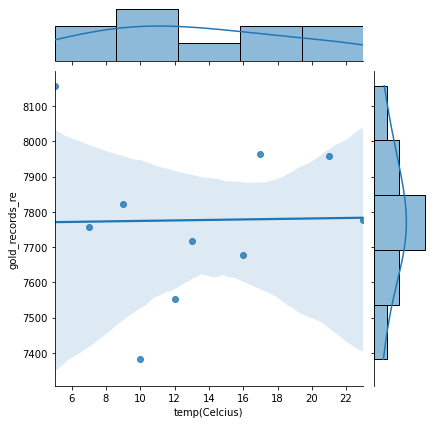

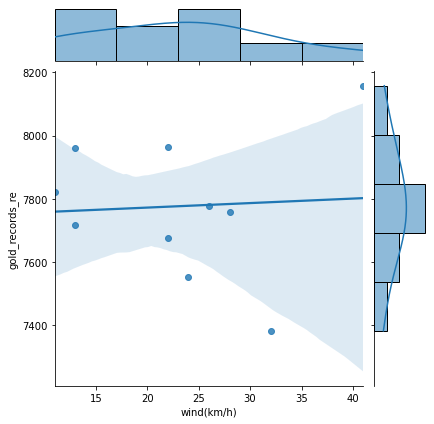

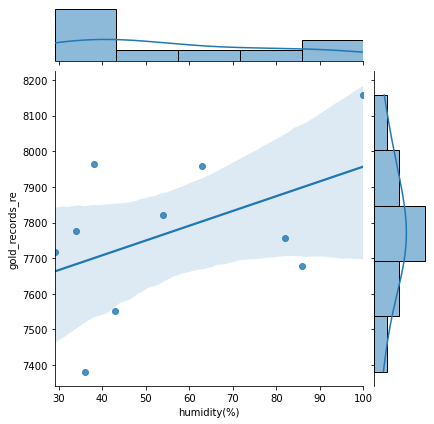

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

jp1 = sns.jointplot( x = 'temp(Celcius)', y = 'gold_records_re', data=df_men_records_re, kind = 'reg')
jp2 = sns.jointplot( x = 'wind(km/h)', y = 'gold_records_re', data=df_men_records_re, kind = 'reg')
jp3 = sns.jointplot( x = 'humidity(%)', y = 'gold_records_re', data=df_men_records_re, kind = 'reg')


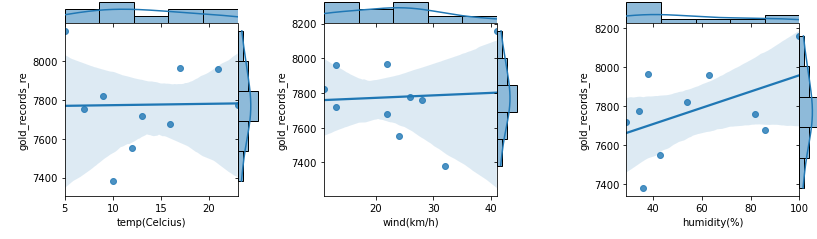

In [67]:

#subplots migration
f = plt.figure()
for jp in [jp1, jp2, jp3]:
    for a in jp.fig.axes:
        f._axstack.add(f._make_key(a), a)


#subplots size adjustment
f.axes[0].set_position([0.15, 0.10, 0.4,  0.4])
f.axes[1].set_position([0.15, 0.50, 0.4,  0.05])
f.axes[2].set_position([0.55, 0.10, 0.05, 0.4])

f.axes[3].set_position([0.75, 0.10, 0.4,  0.4])
f.axes[4].set_position([0.75, 0.50, 0.4,  0.05])
f.axes[5].set_position([1.15, 0.10, 0.05, 0.4])

f.axes[6].set_position([1.45, 0.10, 0.4,  0.4])
f.axes[7].set_position([1.45, 0.50, 0.4,  0.05])
f.axes[8].set_position([1.85, 0.10, 0.05, 0.4])

In [134]:
gold_records = []
top10_records = []
avg_time = []
std_time = []

for y in year:
    df_re = df_women[df_women['year']==int(y)].reset_index()
    
    gold_rec = df_re[df_re['RankOverGender']==1]['OfficialTime'][0].time()
    gold_records.append(gold_rec)
    
    top10_rec = df_re.iloc[:10]['OfficialTime'].mean().time()
    top10_records.append(top10_rec)
    
    avg_time.append(df_re['OfficialTime'].mean().time())
    #std_time.append(np.std(df_re['OfficialTime']))
    
df_women_records = pd.DataFrame({'year' : year, 'gold_records':gold_records, 'top10_records':top10_records, 'avg_time': avg_time})

In [135]:
for i in range(len(df_women_records)):
    minute = df_women_records.loc[i, 'avg_time'].hour * 60 + df_women_records.loc[i, 'avg_time'].minute
    df_women_records.loc[i, 'avg_minute'] = minute
    
    
for i in range(len(df_women_records)):
    sec = df_women_records.loc[i, 'gold_records'].hour * 60  + df_women_records.loc[i, 'gold_records'].minute 
    df_women_records.loc[i, 'gold_records_re'] = sec
    
    sec_top10 = df_women_records.loc[i, 'top10_records'].hour * 60  + df_women_records.loc[i, 'top10_records'].minute 
    df_women_records.loc[i, 'top10_records_re'] = sec_top10
    

In [136]:
df_women_records =df_women_records.astype({'year':'int64'})

In [137]:
df_women_records_re = pd.merge(df_women_records, temp, how='left', on='year')

In [138]:
df_women_records_re = df_women_records_re[['year', 'temp(Celcius)', 'wind(km/h)', 'humidity(%)', 'gold_records_re', 'top10_records_re', 'avg_minute', ]]

In [139]:
df_women_records_re = df_women_records_re.rename(columns= {'temp(Celcius)':'기온', 'wind(km/h)':'바람', 'humidity(%)':'습도', 'gold_records_re':'금메달_기록', 
                                              'top10_records_re':'상위10위_평균_기록', 'avg_minute':'상위500위_평균_기록'})

In [140]:
df_women_records_re['마라톤'] = 'boston'
df_women_records_re['성별'] = 'women'

In [141]:
df_women_records_re = df_women_records_re[['마라톤', 'year', '기온', '바람', '습도', '성별', '금메달_기록', '상위10위_평균_기록', '상위500위_평균_기록' ]]

In [142]:
df_boston = pd.concat([df_men_records_re, df_women_records_re]).reset_index()

In [143]:
del df_boston['index']

In [144]:
df_boston.to_csv('boston_marathon_yearly.csv', encoding='utf-8-sig')

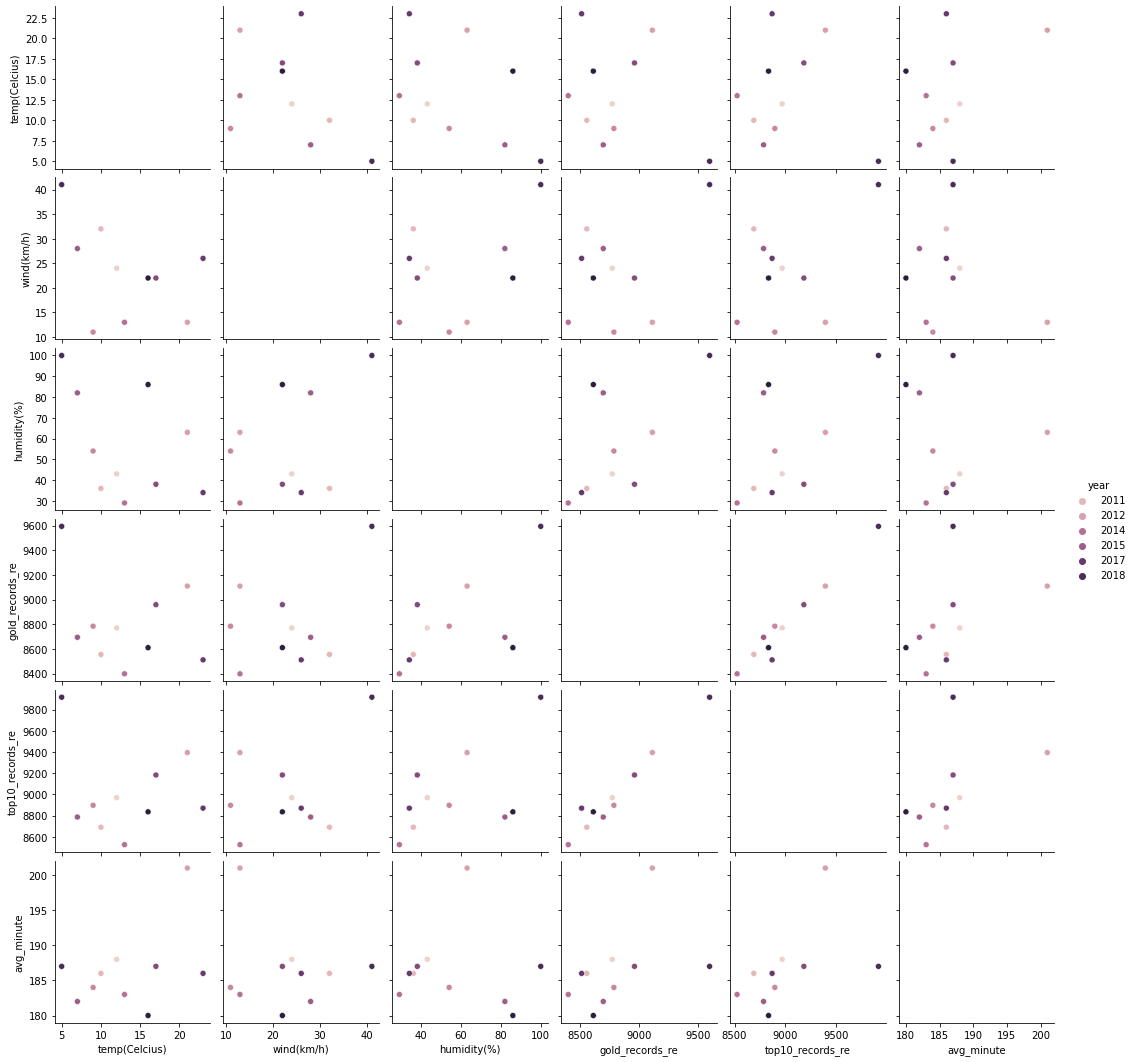

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_women_records_re, hue="year")
plt.show()